<h1> This file is used to check baseline results of the VQE algorithm to ensure accuracy.

<h3> Using the data found in this example problem: https://qiskit.org/ecosystem/optimization/tutorials/06_examples_max_cut_and_tsp.html


In [1]:
# The IBM Qiskit Runtime
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator)
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options

# Saves login credentials to disk, if using new credentials
QiskitRuntimeService.save_account(
    channel="ibm_quantum", token="60a6f674d4c3af8baad5ad33a982e531af05323b4664c4bf90ef0d6d346bac77b0317ebd2e261f7e4d4e903d5983d3435a32c3e634d0085b89d77cd42209bcfa",
    instance="ibm-q-research-2/marist-ibm-1/main", overwrite=True)

service = QiskitRuntimeService()

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]
w above
case = [0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0] cost = 3.0
case = [0, 1, 0, 0] cost = 2.0
case = [1, 1, 0, 0] cost = 3.0
case = [0, 0, 1, 0] cost = 3.0
case = [1, 0, 1, 0] cost = 4.0
case = [0, 1, 1, 0] cost = 3.0
case = [1, 1, 1, 0] cost = 2.0
case = [0, 0, 0, 1] cost = 2.0
case = [1, 0, 0, 1] cost = 3.0
case = [0, 1, 0, 1] cost = 4.0
case = [1, 1, 0, 1] cost = 3.0
case = [0, 0, 1, 1] cost = 3.0
case = [1, 0, 1, 1] cost = 2.0
case = [0, 1, 1, 1] cost = 3.0
case = [1, 1, 1, 1] cost = 0.0

Best solution = [1, 0, 1, 0] cost = 4.0
['dashed', 'solid', 'dashed', 'solid']


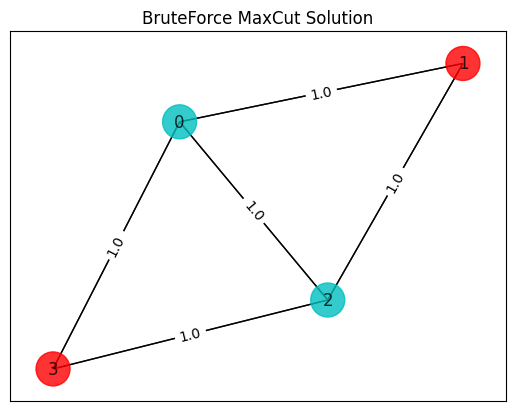

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime

# Setting a variable to the current time using now()
current_time = datetime.datetime.now()

# Generating a graph of n nodes
n=4 # Number of nodes in graph


G = nx.Graph()  # Graph G is the Brute Force Graph
G2 = nx.Graph()  # Graph G2 is the VQE Solution Graph
G3 = nx.Graph()  # Graph G3 is the EigenOptimizer Check Solution Graph


G.add_nodes_from(np.arange(0, n, 1))
G2.add_nodes_from(np.arange(0, n, 1))
G3.add_nodes_from(np.arange(0, n, 1))


# List is formatted as the following
#   (x, y, z)
#   x = # of the node (it's identifier)
#   y = The node that x is connected to
#   z = Weight of the line between x and y

elist=[ 
       
    (0, 1, 1.19),
    (0, 2, 1.0),
    (0, 3, 1.0),

    (1, 0, 1.0),
    (1, 2, 1.0),
    
    (2, 0, 1.0),
    (2, 1, 1.0),
    (2, 3, 1.0),
    
    (3, 0, 1.0),
    (3, 2, 1.0)
    
                ]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)
G2.add_weighted_edges_from(elist)
G3.add_weighted_edges_from(elist)


colors = ['r' for node in G.nodes()]
colors2 = ['r' for node in G2.nodes()]
colors3 = ['r' for node in G3.nodes()]

pos = nx.spring_layout(G)
pos2 = nx.spring_layout(G2)
pos3 = nx.spring_layout(G3)

style2 = ['solid' for edge in G2.edges()]
style3 = ['solid' for edge in G3.edges()]



def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "BruteForce MaxCut Solution"
    
    # Label variable for X-axis
    xax = ""
    
    # Label variable for Y-axis
    yax = ""
    
    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)
    
    # Main drawing call of the graph
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
    # edge_color : color or array of colors (default='k')
    # Find a way to make cut lines into dotted lines
    
    # Create 2 edgelists. 1 with the non-cut edges, and another with only the cut edges
    
    # cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
    # uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]
    
    # nx.draw_networkx_edges(G, pos, edgelist=cut_edges,
    #                       style='dashdot', alpha=0.5, width=3)
    # nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)


def draw_graph2(G2, colors2, pos2, style2):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "SamplingVQE Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    style2 = nx.get_edge_attributes(G2, 'style')
    nx.draw_networkx_edges(G2, pos=pos2, style=style2)
    nx.draw_networkx(G2, node_color=colors2, node_size=600, alpha=.8, ax=default_axes, pos=pos2)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos=pos2, edge_labels=edge_labels)
    

def draw_graph3(G3, colors3, pos3, style3):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "EO Check Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    style3 = nx.get_edge_attributes(G3, 'style')
    nx.draw_networkx_edges(G3, pos=pos3, style=style3)
    nx.draw_networkx(G3, node_color=colors3, node_size=600, alpha=.8, ax=default_axes, pos=pos3)
    edge_labels = nx.get_edge_attributes(G3, 'weight')
    nx.draw_networkx_edge_labels(G3, pos=pos3, edge_labels=edge_labels)

# Executing our draw_graph function to draw the graph
# draw_graph(G, colors, pos)

""" # Formats date for use in file saving
curTime = current_time.hour + ":" + current_time.minute + "_" + current_time.month + "/" + current_time.date + "/" + current_time.year
nx.draw(draw_graph(G, colors, pos))

# Saves graph as file in directory with timestamp
plt.savefig("BestBrute" + curTime ".png") """

# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)
print("w above")

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
style = ['solid' if xbest_brute[i] == 0 else 'dashed' for i in range(n)]


# Final draw of graph
draw_graph(G, colors, pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))
print(style)

0.5 * IIZZ
+ 0.5 * IZIZ
+ 0.5 * IZZI
+ 0.5 * ZIIZ
+ 0.5 * ZZII


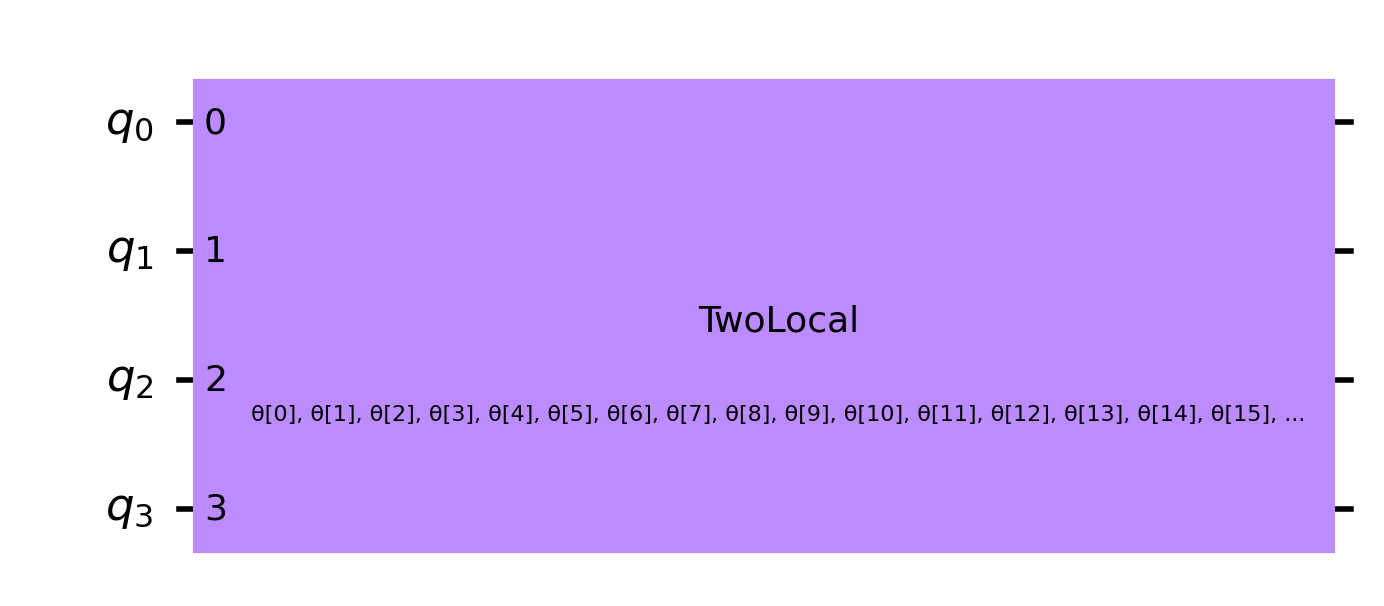

In [3]:
# General imports
import time
import numpy as np

# VQE Imports
from qiskit.algorithms.optimizers import OptimizerResult
from qiskit.algorithms.minimum_eigensolvers import VQE, VQEResult
from qiskit.algorithms.optimizers import SPSA

from qiskit.primitives import Estimator
# from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.circuit.library import EfficientSU2

# SciPy minimizer routine
from scipy.optimize import minimize

# Pre-defined ansatz circuit and operator class for Hamiltonian (Unused)
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp


# Desired instance goes here, 
# for running jobs on the quantum machine, use "ibmq_guadalupe"
# For running jobs on a simulator, use "simulator_statevector" or "ibmq_qasm_simulator"
backend = "ibmq_guadalupe"

# Plotting functions
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Maxcut import
from qiskit_optimization.applications import Maxcut


# Define our Qiskit Maxcut Instance
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()

# Translate to Ising Hamiltonian
qubitOp, offset = qp.to_ising()

print(qubitOp)


# Note: Look into using different ansatz than EfficientSU2, as some may be a better fit for our application
ansatz = TwoLocal(qubitOp.num_qubits, "ry", "cz",
              reps=5, entanglement="linear")
ansatz.draw("mpl")

In [4]:
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms import MinimumEigensolver

qc = EfficientSU2(num_qubits=qubitOp.num_qubits, reps=1)

qc_with_meas = qc.measure_all(inplace=False)
qc_with_meas.decompose().draw(fold=120)

┌──────────┐┌──────────┐                                ┌──────────┐┌───────────┐ ░ ┌─┐         
   q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├────────────────────────■───────┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├─░─┤M├─────────
        ├──────────┤├──────────┤                      ┌─┴─┐     ├──────────┤├───────────┤ ░ └╥┘┌─┐      
   q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├───────────■──────────┤ X ├─────┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├─░──╫─┤M├──────
        ├──────────┤├──────────┤         ┌─┴─┐    ┌───┴───┴───┐┌┴──────────┤└───────────┘ ░  ║ └╥┘┌─┐   
   q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├──■──────┤ X ├────┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├──────────────░──╫──╫─┤M├───
        ├──────────┤├──────────┤┌─┴─┐┌───┴───┴───┐├───────────┤└───────────┘              ░  ║  ║ └╥┘┌─┐
   q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├┤ X ├┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├───────────────────────────░──╫──╫──╫─┤M├
        └──────────┘└──────────┘└───┘└───────────┘└───────────┘                           ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                             0  1  2  3

In [5]:
# define a set of (random) parameter values for the ansatz circuit
import numpy as np
theta = np.random.rand(qc.num_parameters)


In [6]:
def bitfield(n: int, L: int) -> list[int]:
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part

In [7]:
from qiskit.result import QuasiDistribution
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler
from qiskit.quantum_info import Pauli, Statevector
from qiskit.result import QuasiDistribution
from qiskit.utils import algorithm_globals

sampler = Sampler()


def sample_most_likely(state_vector: Statevector) -> np.ndarray:
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)


In [8]:
class CustomVQE(MinimumEigensolver):

    def __init__(self, estimator, circuit, optimizer, callback=None):
        self._estimator = estimator
        self._circuit = circuit
        self._optimizer = optimizer
        self._callback = callback

    def compute_minimum_eigenvalue(self, operators, aux_operators=None):

        # Define objective function to classically minimize over
        def objective(x):
            # Execute job with estimator primitive
            job = self._estimator.run([self._circuit], [operators], [x])
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            # Save result information using callback function
            if self._callback is not None:
                self._callback(value)
            return value

        # Select an initial point for the ansatzs' parameters
        x0 = np.pi/4 * np.random.rand(self._circuit.num_parameters)

        # Run optimization
        res = self._optimizer.minimize(objective, x0=x0)

        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = res.fun
        result.optimal_parameters = res.x
        return result

In [9]:
# Define a simple callback function
intermediate_info = []


def callback(value):
    intermediate_info.append(value)

In [10]:
def build_callback(ansatz, qubitOp, sampler, callback_dict):
    """Return callback function that uses Estimator instance,
    and stores intermediate values into a dictionary.

    Parameters:
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        qubitOp (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance
        callback_dict (dict): Mutable dict for storing values

    Returns:
        Callable: Callback function object
    """
    iterations = 0

    def callback(current_vector):
        """Callback function storing previous solution vector,
        computing the intermediate cost value, and displaying number
        of completed iterations and average time per iteration.

        Values are stored in pre-defined 'callback_dict' dictionary.

        Parameters:
            current_vector (ndarray): Current vector of parameters
                                      returned by optimizer
        """
        # Keep track of the number of iterations
        callback_dict["iters"] += 1
        # Set the prev_vector to the latest one
        callback_dict["prev_vector"] = current_vector
        # Compute the value of the cost function at the current vector
        callback_dict["cost_history"].append(
            sampler.run(ansatz, qubitOp, parameter_values=current_vector)
            .result()
            .values[0]
        )
        # Grab the current time
        current_time = time.perf_counter()
        # Find the total time of the execute (after the 1st iteration)
        if callback_dict["iters"] > 1:
            callback_dict["_total_time"] += current_time - \
                callback_dict["_prev_time"]
        # Set the previous time to the current time
        callback_dict["_prev_time"] = current_time
        # Compute the average time per iteration and round it
        time_str = (
            round(callback_dict["_total_time"] /
                  (callback_dict["iters"] - 1), 2)
            if callback_dict["_total_time"]
            else "-"
        )
        # Print to screen on single line
        print(
            "Iters. done: {} [Avg. time per iter: {}]".format(
                callback_dict["iters"], time_str
            ),
            end="\r",
            flush=True,
        )

    return callback


<h1> VQE Session in Runtime

SamplingMinimumEigensolverResult:
	Eigenvalue: -1.499724518911207
	Best measurement
: {'state': 5, 'bitstring': '0101', 'value': (-1.5+0j), 'probability': 0.1187735268990495}

execution time (s): 20.60
energy: -1.499724518911207
time: 20.576061725616455
max-cut objective: -3.999724518911207
solution: [0 1 0 1]
solution objective: 4.0


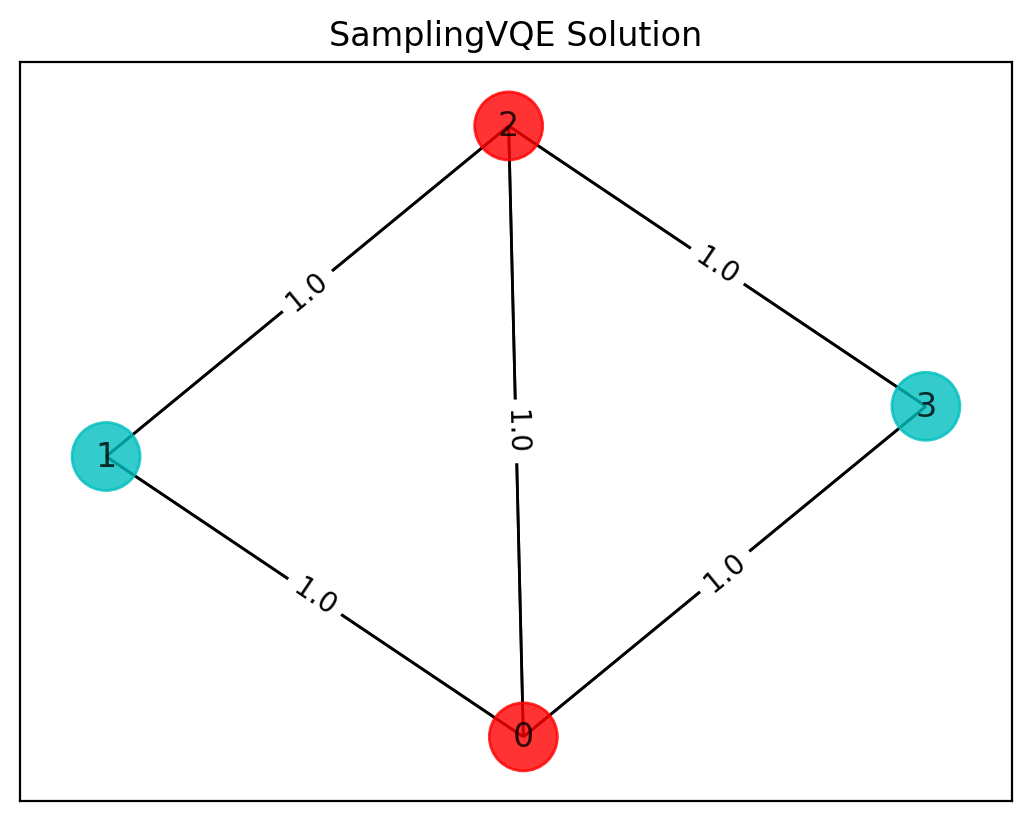

In [11]:
from qiskit.primitives import Estimator, Sampler
from qiskit_ibm_runtime import (Session, Options, QiskitRuntimeService,
                                Sampler as RuntimeSampler,
                                Estimator as RuntimeEstimator)
from qiskit_ibm_runtime import Estimator
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit.quantum_info import Operator
from qiskit.primitives import Sampler
from time import time

# Run custom vqe
with Session(backend=backend) as session:
    
    estimator = Estimator(options={"shots": 2048})
    
    optimizer = SPSA(maxiter=1000)
    
    ry = TwoLocal(qubitOp.num_qubits, "ry", "cz",
                  reps=5, entanglement="linear")

    
    # custom_vqe = CustomVQE(estimator, ansatz, optimizer, callback=callback)
    
    sampling_vqe = SamplingVQE(sampler=Sampler(), ansatz=ry , optimizer=optimizer)

    
    # Run the custom VQE function and monitor execution time
    start = time()
    result = sampling_vqe.compute_minimum_eigenvalue(qubitOp)
    end = time()

    print(result)
    print(f'execution time (s): {end - start:.2f}')
        
    session.close()


x = max_cut.sample_most_likely(result.eigenstate)
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
print('max-cut objective:', result.eigenvalue.real + offset)
print('solution:', x)
print('solution objective:', qp.objective.evaluate(x))

# plot results
colors2 = ['r' if x[i] == 0 else 'c' for i in range(n)]
style2 = ['solid' if x[i] == 0 else 'dashed' for i in range(n)]

draw_graph2(G2, colors2, pos2, style2)

<h1> Eigenoptimizer Check

objective function value: 4.0
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0
status: SUCCESS


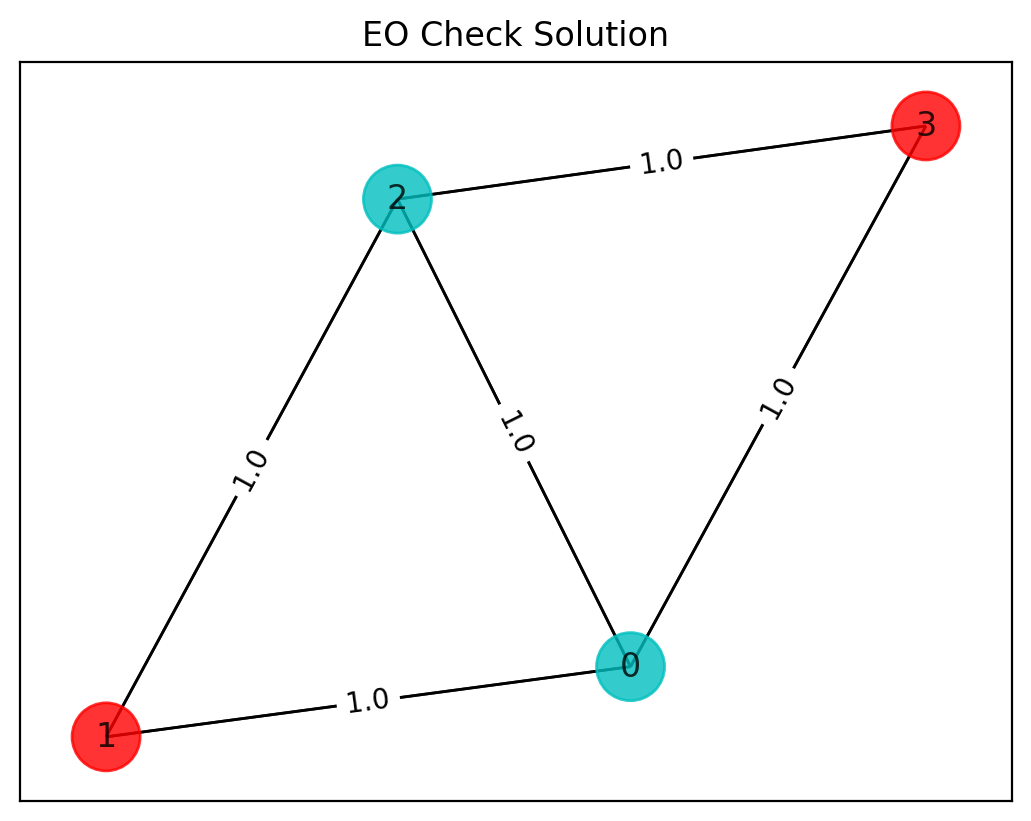

In [12]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
 
# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(sampling_vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

colors3 = ["r" if result.x[i] == 0 else "c" for i in range(n)]
style3 = ['solid' if result.x[i] == 0 else 'dashed' for i in range(n)]

draw_graph3(G3, colors3, pos3, style3)


<h3> Algorithm success on example problem 06/27/23

## VQE Circuit

*Not quite sure what effect this has on current code

In [ ]:
# from ibm_quantum_widgets import CircuitComposer
from qiskit import *
from qiskit.circuit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit



optimal_qc = res.get_optimal_circuit()
editor = CircuitComposer(circuit=optimal_qc)

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

# Attention:
# ----------
# Custom gates are not supported yet in version v2.0.18
# Find following an equivalent qasm based circuit:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate woLocal(param0, param1, param2, param3, param4, param5, param6, param7, param8, param9, param10, param11, param12, param13, param14, param15, param16, param17, param18, param19, param20, param21, param22, param23, param24, param25, param26, param27, param28, param29) q0, q1, q2, q3, q4 {
  ry(4.17547467622234) q0;
  ry(-6.28821176436223) q1;
  ry(-1.40486327346273) q2;
  ry(-1.65761619691524) q3;
  ry(-6.14158138762570) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(5.73372000866355) q0;
  ry(4.44984240828826) q1;
  ry(-2.16630455123368) q2;
  ry(5.25310273616428) q3;
  ry(6.60377416164812) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-3.02596698749212) q0;
  ry(-5.23189687300101) q1;
  ry(4.40282278376381) q2;
  ry(-1.59837998872848) q3;
  ry(4.87056597878950) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(0.292183299692795) q0;
  ry(4.66344709704271) q1;
  ry(-2.75794041871292) q2;
  ry(6.36851929306560) q3;
  ry(1.97367616622618) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-2.59972754332686) q0;
  ry(-6.34598189366981) q1;
  ry(-1.63846773063449) q2;
  ry(-0.414504994387513) q3;
  ry(-5.76970867997880) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-7.15380384732267) q0;
  ry(-0.901232949916589) q1;
  ry(-0.606527349276767) q2;
  ry(3.11855267646828) q3;
  ry(-1.11874403569820) q4;
}

qreg q[5];

woLocal(4.17547467622234,-6.28821176436223,-1.40486327346273,-1.65761619691524,-6.14158138762570,5.73372000866355,4.44984240828826,-2.16630455123368,5.25310273616428,6.60377416164812,-3.02596698749212,-5.23189687300101,4.40282278376381,-1.59837998872848,4.87056597878950,0.292183299692795,4.66344709704271,-2.75794041871292,6.36851929306560,1.97367616622618,-2.59972754332686,-6.34598189366981,-1.63846773063449,-0.414504994387513,-5.76970867997880,-7.15380384732267,-0.901232949916589,-0.606527349276767,3.11855267646828,-1.11874403569820) q[0],q[1],q[2],q[3],q[4];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)